In [63]:
import os
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.stats.multicomp as mc
from scipy.stats import f_oneway
import numpy as np


In [23]:
# Get the current working directory path
cwd = os.getcwd()

# Get the path to the data directory
data_path = os.path.dirname(os.path.abspath(cwd)) + "/data"
print(data_path)

/Users/jiayan/Downloads/codes_macs_2022-2023/macs30200/replication-materials-jiayanli/data


In [34]:
# read csv
df_clean = pd.read_csv(data_path + "/clean_data.csv")

df_clean.head()

,Period,Username,Date,URL,Content,TweetID,MentionedUsers,Longitude,Latitude,CountryCode,Place,UserID,FollowersCount,UserDescription,UserURL
0,0,tewillmott,2019-08-14T23:59:42+00:00,https://twitter.com/tewillmott/status/11617895...,motivation sweat today smile tomorrow,1161789524902440960,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott
1,0,tewillmott,2019-08-14T23:50:39+00:00,https://twitter.com/tewillmott/status/11617872...,time kill fat,1161787246460096512,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott
2,0,tewillmott,2019-08-14T23:45:06+00:00,https://twitter.com/tewillmott/status/11617858...,challenge every day,1161785852357308416,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott
3,0,tewillmott,2019-08-14T23:40:11+00:00,https://twitter.com/tewillmott/status/11617846...,excuse dont burn calorie fitnessmodel,1161784615822155777,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott
4,0,tewillmott,2019-08-14T23:36:21+00:00,https://twitter.com/tewillmott/status/11617836...,let get leg right fitnessmodel,1161783648443482112,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott


## Sentiment Analysis

In [35]:
# Download VADER lexicon
# nltk.download('vader_lexicon')

# Initialize VADER analyzer
sid = SentimentIntensityAnalyzer()

In [36]:
# Define a function to apply the analyzer to each tweet and return the sentiment score
def get_sentiment_score(tweet):
    scores = sid.polarity_scores(tweet)
    return scores['compound']

# Apply the function to each tweet in the dataset and add the sentiment score as a new column
df_clean['sentiment_score'] = df_clean['Content'].apply(get_sentiment_score)

In [37]:
# Define a function to label each tweet as positive, negative, or neutral based on the sentiment score
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each sentiment score and add the sentiment label as a new column
df_clean['sentiment_label'] = df_clean['sentiment_score'].apply(get_sentiment_label)

In [38]:
df_clean.head()

,Period,Username,Date,URL,Content,TweetID,MentionedUsers,Longitude,Latitude,CountryCode,Place,UserID,FollowersCount,UserDescription,UserURL,sentiment_score,sentiment_label
0,0,tewillmott,2019-08-14T23:59:42+00:00,https://twitter.com/tewillmott/status/11617895...,motivation sweat today smile tomorrow,1161789524902440960,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,0.5994,positive
1,0,tewillmott,2019-08-14T23:50:39+00:00,https://twitter.com/tewillmott/status/11617872...,time kill fat,1161787246460096512,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,-0.6908,negative
2,0,tewillmott,2019-08-14T23:45:06+00:00,https://twitter.com/tewillmott/status/11617858...,challenge every day,1161785852357308416,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,0.0772,positive
3,0,tewillmott,2019-08-14T23:40:11+00:00,https://twitter.com/tewillmott/status/11617846...,excuse dont burn calorie fitnessmodel,1161784615822155777,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,0.0772,positive
4,0,tewillmott,2019-08-14T23:36:21+00:00,https://twitter.com/tewillmott/status/11617836...,let get leg right fitnessmodel,1161783648443482112,NaN,NaN,NaN,NaN,NaN,2378977625,239,Make up artist for film and television. Also ...,https://twitter.com/tewillmott,0.0000,neutral


In [42]:
df_clean[df_clean['Period'] == 0].sentiment_score.describe()

count    11961.000000
mean         0.220345
std          0.362536
min         -0.942300
25%          0.000000
50%          0.000000
75%          0.510600
max          0.991100
Name: sentiment_score, dtype: float64

In [43]:
df_clean[df_clean['Period'] == 1].sentiment_score.describe()

count    6071.000000
mean        0.209718
std         0.357862
min        -0.946800
25%         0.000000
50%         0.000000
75%         0.493900
max         0.979600
Name: sentiment_score, dtype: float64

In [44]:
df_clean[df_clean['Period'] == 2].sentiment_score.describe()

count    1409.000000
mean        0.231629
std         0.381496
min        -0.902200
25%         0.000000
50%         0.051600
75%         0.571900
max         0.975300
Name: sentiment_score, dtype: float64

Based on the descriptive data above, we can observe that the mean compound score of sentiment is highest for late-pandemic fitpiration tweets, followed by pre-pandemic and then early-pandemic. This suggests that, on average, late-pandemic fitpiration tweets are more positive than pre-pandemic ones, with early-pandemic tweets being the least optimistic.

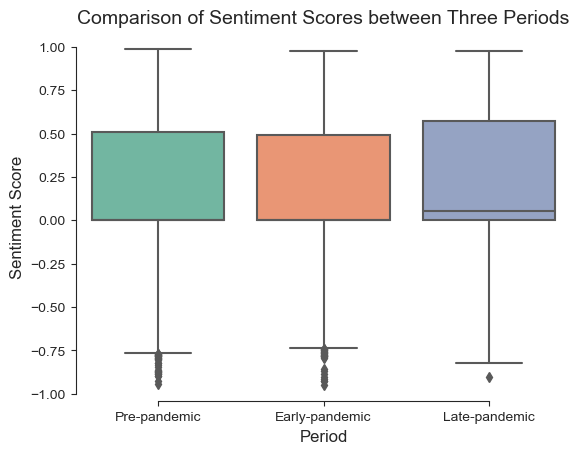

In [59]:
# Create a box plot to compare the three groups
sns.set_style("ticks")
ax = sns.boxplot(x='Period', y='sentiment_score', data=df_clean)
sns.despine(trim=True)
sns.set_palette("Set2")

# Set the x-axis tick labels
ax.set_xticklabels(['Pre-pandemic', 'Early-pandemic', 'Late-pandemic'])

# Add a title and axis labels
plt.title('Comparison of Sentiment Scores between Three Periods', fontsize=14)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)

# Save the figure
plt.savefig('sentiment_scores.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

ANOVA (Analysis of Variance) test to determine whether there is a statistically significant difference between the three groups

In [60]:
# Extract the sentiment scores for each period
period_0 = df_clean[df_clean['Period'] == 0]['sentiment_score']
period_1 = df_clean[df_clean['Period'] == 1]['sentiment_score']
period_2 = df_clean[df_clean['Period'] == 2]['sentiment_score']

# Perform an ANOVA test
f_stat, p_value = f_oneway(period_0, period_1, period_2)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 2.8289735993699754
p-value: 0.05909777784306111


p-value is right on edge of the chosen significance level (0.05). Therefore, I performed post-hoc tests (Tukey's HSD) to determine which pairs of groups have a significant difference in means.

In [67]:
# Define the groups to compare
groups = [0, 1, 2]

# Create a list of Series—the sentiment scores for each group
data = [df_clean[df_clean['Period'] == i]['sentiment_score'] for i in groups]

# Perform Tukey's HSD test
tukey = mc.MultiComparison(np.concatenate(data), 
                           np.concatenate([np.zeros(len(data[i])) + i 
                                           for i in range(len(data))]))
result = tukey.tukeyhsd()

# Print the results
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0  -0.0106 0.1504  -0.024 0.0028  False
   0.0    2.0   0.0113 0.5109 -0.0126 0.0352  False
   1.0    2.0   0.0219 0.1019 -0.0032  0.047  False
---------------------------------------------------


The Tukey HSD test has found that there is no significant difference between groups 0 and 1 (p-adj = 0.1504), no significant difference between groups 0 and 2 (p-adj = 0.5109), and no significant difference between groups 1 and 2 (p-adj = 0.1019).